In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data = pd.read_csv('./datasets/train_data.csv')
data.head()

,text,label
0,The fact that every single major department of...,0
1,He added that himself and families and women i...,0
2,"BTW , here 's a statement which our apex court...",0
3,Hospitals fill as Rohingya refugees shiver thr...,1
4,But in pregnant women it can cause microcephal...,0


Bag of words model
Naive Bayesian Classification

In [18]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# X = cv.fit_transform(data['text']).toarray()
# y = data['label'].values

# train test split
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('./datasets/train_data.csv')
test_data = pd.read_csv('./datasets/test_data.csv')




In [19]:
# find the null values and remove them
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# find the null values and remove them
print(test_data.isnull().sum())
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']




text     0
label    0
dtype: int64
text     0
label    0
dtype: int64
(7537, 25537)


### Downsampling

In [164]:
# extract the data with 0 label, the same snumber of 1 label
# and combine them together
# 0 label
data_0 = train_data[train_data['label'] == 0]
# 1 label
data_1 = train_data[train_data['label'] == 1]
# combine them together
n = int(len(data_1)*2)
data_0 = data_0.sample(n , random_state=42)
data = pd.concat([data_0, data_1], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
# data.head()
# print(data[data['label'] == 1].count())
X_train, y_train = data['text'], data['label']

### Upsampling

In [165]:
# data_0 = train_data[train_data['label'] == 0]
# # 1 label
# data_1 = train_data[train_data['label'] == 1]

# data = pd.concat([data_0, data_1], axis=0)
# for i in range(9):
#     data = pd.concat([data, data_1], axis=0)
# X_train, y_train = data['text'], data['label']

In [166]:

test_data.dropna(inplace=True)
bow = cv.fit_transform(X_train)
print(bow.shape)



(2400, 13687)


In [167]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(bow, y_train)

# test
test_bow = cv.transform(X_test)
print("accuracy: ", model.score(test_bow, y_test))
# F1 score
from sklearn.metrics import f1_score
y_pred = model.predict(test_bow)
print("F1 score: ", f1_score(y_test, y_pred))



accuracy:  0.8533205924510272
F1 score:  0.3481953290870488


In [168]:
val_data = pd.read_csv('./datasets/val_data.csv')
val_data.dropna(inplace=True)
X_val, y_val = val_data['text'], val_data['label']
val_bow = cv.transform(X_val)
print("accuracy: ", model.score(val_bow, y_val))
# F1 score
from sklearn.metrics import f1_score
y_pred = model.predict(val_bow)
print("F1 score: ", f1_score(y_val, y_pred))


accuracy:  0.8842482100238663
F1 score:  0.45197740112994345


Baseline 2: Logistic Regression

In [169]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bow, y_train)

# test
test_bow = cv.transform(X_test)
print("accuracy: ", model.score(test_bow, y_test))
# F1 score
from sklearn.metrics import f1_score
y_pred = model.predict(test_bow)
print("F1 score: ", f1_score(y_test, y_pred))


accuracy:  0.8375537505972288
F1 score:  0.36090225563909767


/Users/yanbo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [170]:
val_bow = cv.transform(X_val)
print("accuracy: ", model.score(val_bow, y_val))
# F1 score
from sklearn.metrics import f1_score
y_pred = model.predict(val_bow)
print("F1 score: ", f1_score(y_val, y_pred))


accuracy:  0.8460620525059666
F1 score:  0.4


In [171]:
# # use glove
# import numpy as np
# embeddings_index = {}
# f = open('./glove.6B.100d.txt', encoding="utf8")
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

# X_train_glove = []
# for sentence in X_train:
#     words = sentence.split()
#     sentence_vec = np.zeros(100)
#     for word in words:
#         if word in embeddings_index:
#             sentence_vec += embeddings_index[word]
#     X_train_glove.append(sentence_vec)
    
# model = LogisticRegression()
# model.fit(X_train_glove, y_train)

# X_test_glove = []
# for sentence in X_test:
#     words = sentence.split()
#     sentence_vec = np.zeros(100)
#     for word in words:
#         if word in embeddings_index:
#             sentence_vec += embeddings_index[word]
#     X_test_glove.append(sentence_vec)

# print("accuracy: ", model.score(X_test_glove, y_test))
# # F1 score
# from sklearn.metrics import f1_score
# y_pred = model.predict(X_test_glove)
# print("F1 score: ", f1_score(y_test, y_pred))



Found 400000 word vectors.
accuracy:  0.8170090778786431
F1 score:  0.3172905525846702


/Users/yanbo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


It obviouse that the naive way cannot handle the classification on this task, for the bag of words. The logistic classification has better performance than the naive bayesian. Also, if we use the pre-trianed word embeddings, like GLOVE, the simple classification also have poor performance since the high dimensional vector is too sparse and hard to fit for the logistic and naive bayes. Also, the highly unbalanced label lead to the low F1 score.

Text(0.5, 1.0, 'Number of ham and spam messages')

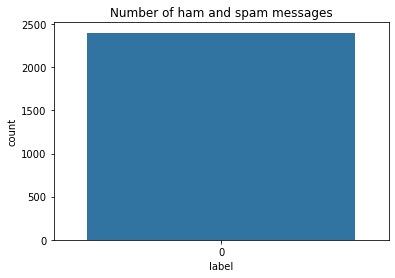

In [172]:
# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')
 

In [173]:
# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

(2400, 1000)
(2400, 13687)


(2400, 1000)
(2400, 13687)


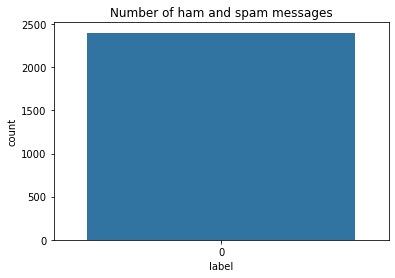

In [174]:
# visualize the 
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)

# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')

# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

# visualize the
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)